### CIS Interaction 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.fftpack import fft
import numpy as np
import pywt

%matplotlib inline

In [6]:
df = pd.read_csv("mprobc_chr1_100kb.csv",delimiter=',', header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954
0,chr1-0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1-100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1-200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1-300000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1-400000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
header = df.pop(0)
df.head()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
scaled_values
# df.loc[:,:] = scaled_values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.02877162,
        0.01745562],
       [0.        , 0.        , 0.        , ..., 0.0170194 , 1.        ,
        0.01952663],
       [0.        , 0.        , 0.        , ..., 0.00520282, 0.009839  ,
        1.        ]])

### FFT 

In [9]:
N = 300

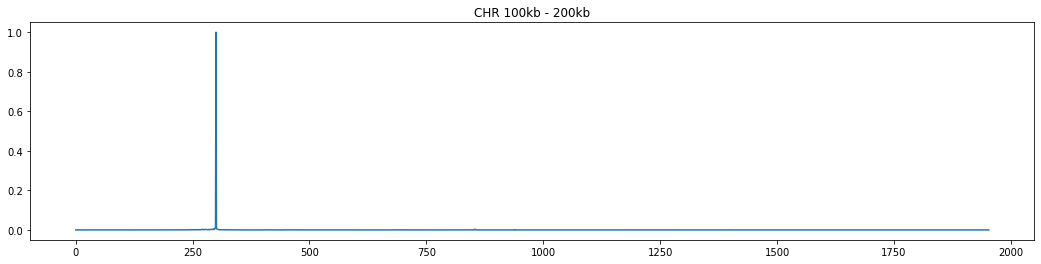

In [10]:

chr1_ = list(scaled_values[N])
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 100kb - 200kb')
ax.plot(chr1_)
plt.show()

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


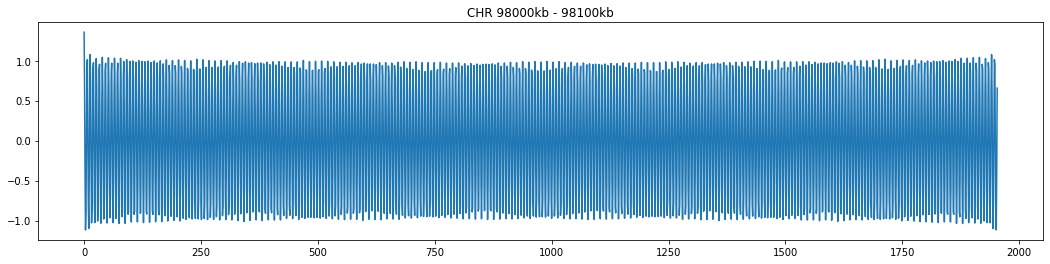

In [11]:
yf = fft(chr1_)
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(yf)
plt.show()

### The above pattern are because of the peak value 

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


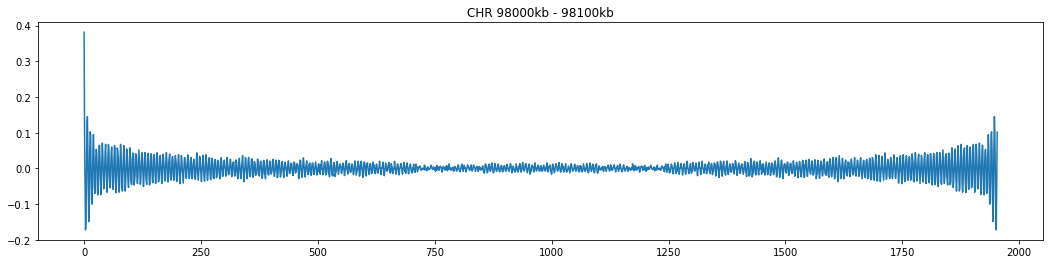

In [12]:
chr1_[N] = chr1_[N-1] + chr1_[N+1]
yf = fft(chr1_)
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(yf)
plt.show()

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


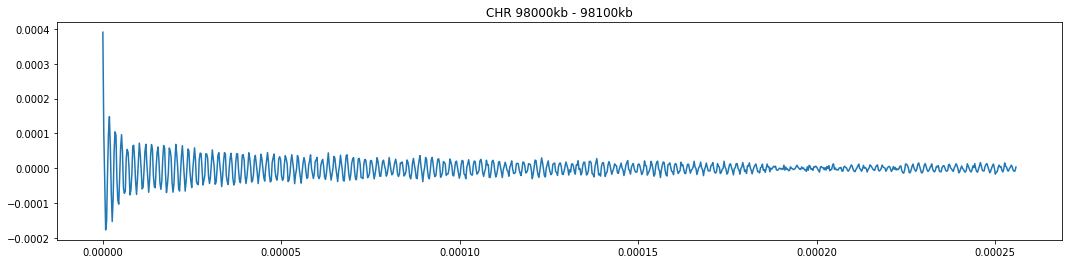

In [13]:
xf = np.linspace(0.0, 1.0/(2.0*1954), 1954//2)


fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(xf, 2.0/1954 * yf[0:1954//2])
plt.show()

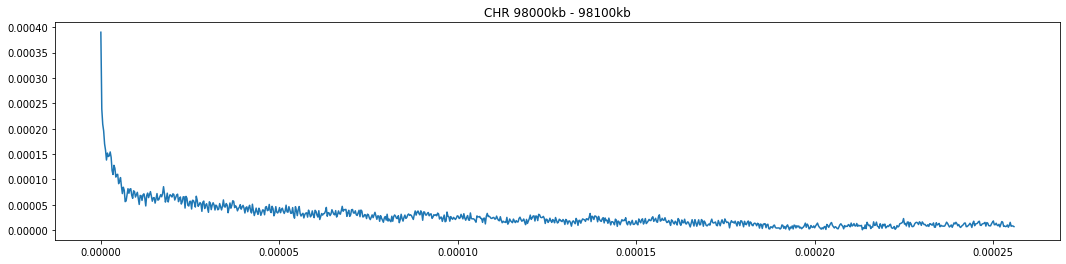

In [14]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(xf, 2.0/1954 * np.abs(yf[0:1954//2]))
plt.show()

### Wavelet Transformation

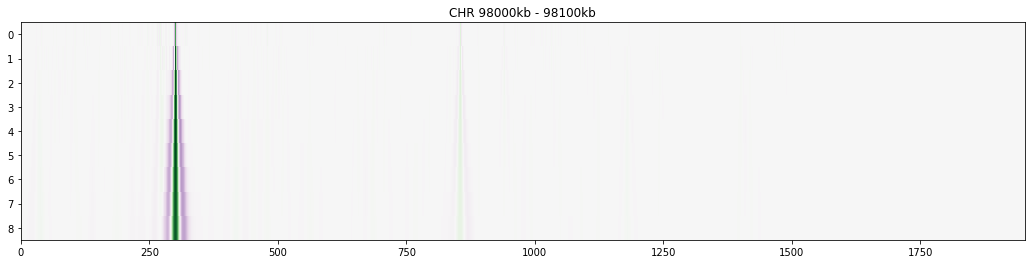

In [15]:
from scipy import signal
import matplotlib.pyplot as plt

widths = np.arange(1, 10)
cwtmatr = signal.cwt(chr1_, signal.ricker, widths)

fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

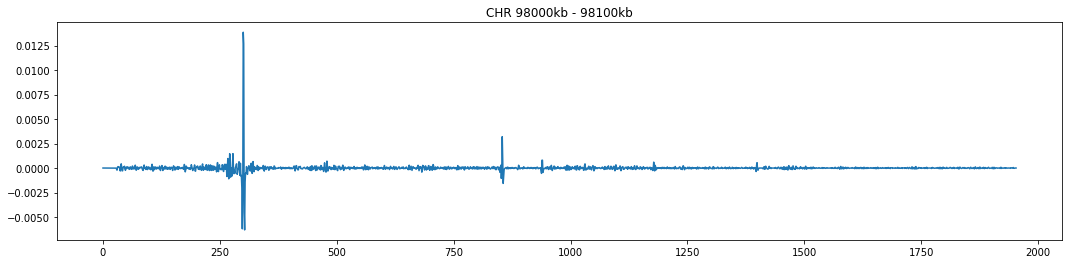

In [16]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(cwtmatr[0])
plt.show()

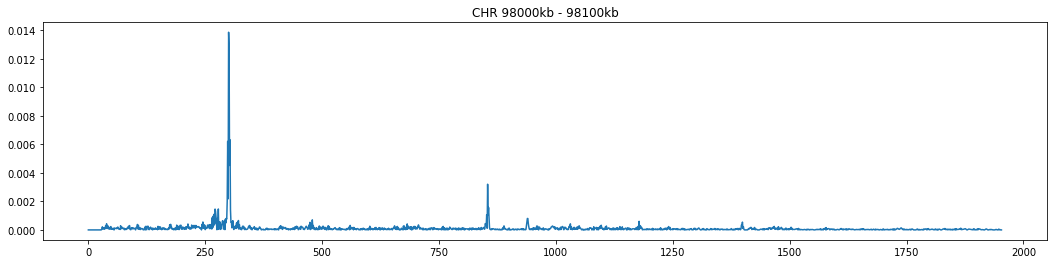

In [17]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(np.abs(cwtmatr[0]))
plt.show()

In [18]:
result = np.fft.fft2(df.as_matrix())

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


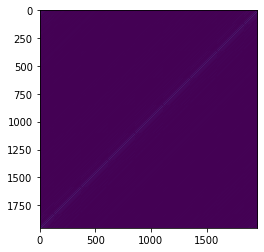

In [19]:
%matplotlib inline

plt.imshow(np.absolute(result))

coeffs2 = pywt.dwt2(scaled_values, 'bior1.3')

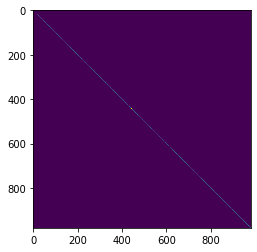

In [20]:
plt.imshow(np.load('wt.npy'))

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


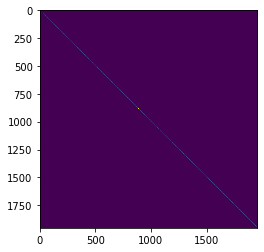

In [24]:
plt.imshow(df.as_matrix())

## Trans Interactions

In [27]:
df_t = pd.read_csv("../../mprobc_250kb.csv",delimiter=',', header=None)

In [30]:
df_t_m = df_t.as_matrix()

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [34]:
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,10893,10894,10895,10896,10897,10898,10899,10900,10901,10902
0,chr1-0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1-250000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1-500000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1-750000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1-1000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_t_m[0][1:]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

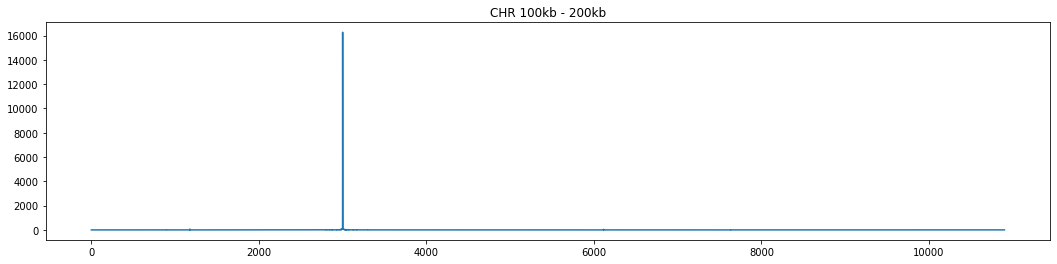

In [38]:
chr1_ = list(df_t_m[3000][1:])
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 100kb - 200kb')
ax.plot(chr1_)
plt.show()

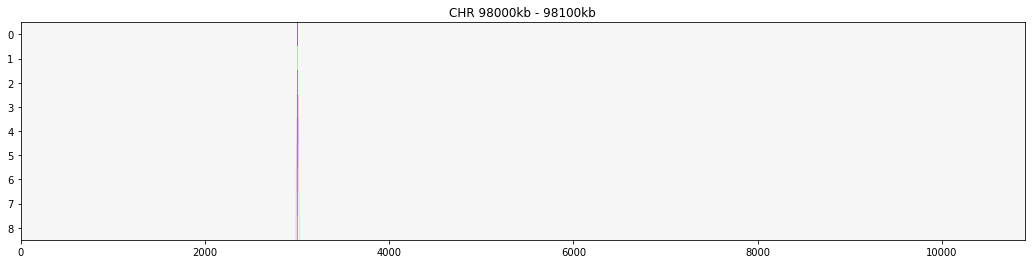

In [39]:
widths = np.arange(1, 10)
cwtmatr = signal.cwt(chr1_, signal.ricker, widths)

fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

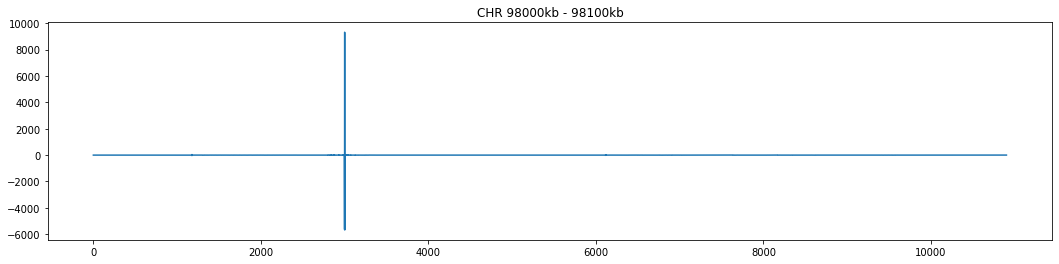

In [40]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(cwtmatr[0])
plt.show()

In [42]:
header = df_t.pop(0)
scaler = MinMaxScaler() 
scaled_values_t = scaler.fit_transform(df_t) 


KeyError: 0

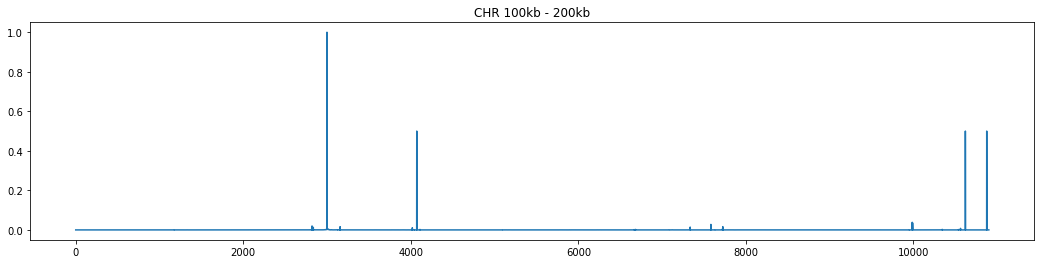

In [46]:
chr1_ = list(scaled_values_t[3000][1:])
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 100kb - 200kb')
ax.plot(chr1_)
plt.show()

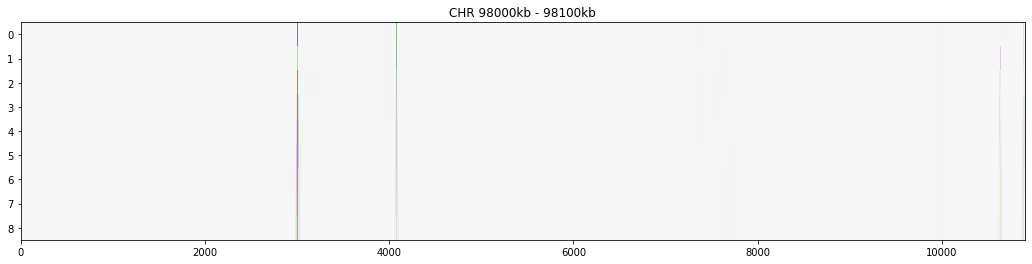

In [45]:
widths = np.arange(1, 10)
cwtmatr = signal.cwt(scaled_values_t[3000], signal.ricker, widths)

fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

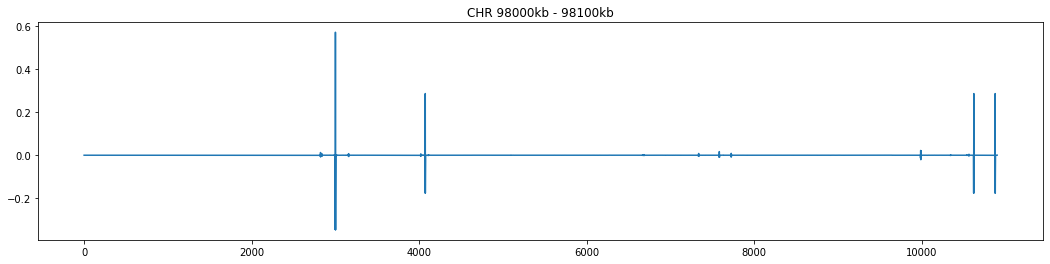

In [47]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(cwtmatr[0])
plt.show()

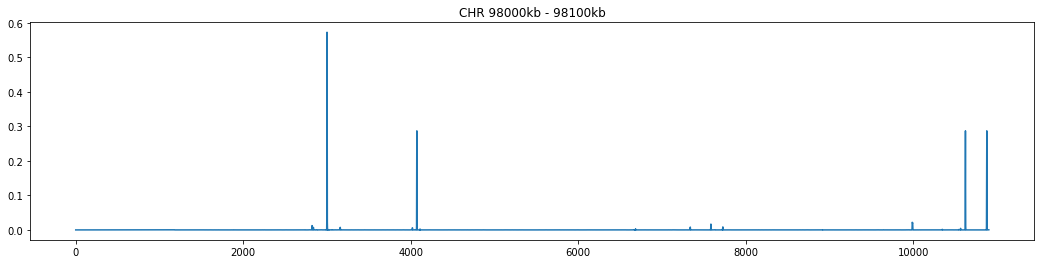

In [48]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(np.abs(cwtmatr[0]))
plt.show()